---
title: "Starting With Data"
teaching: ??
exercises: ??
questions:
- "How does Python deal with data tables?"
objectives:
- "Explain what a library is, and what libraries are used for."
- "Load a Python/Pandas library."
- "Read tabular data from a file into Python using Pandas using *read_csv*."
- "Learn about the Pandas DataFrame object."
- "Learn about data slicing and indexing."
- "Perform mathematical operations on numeric data."
- "Create simple plots of data."

keypoints:
- "Core concepts in python: Python libraries, Pandas DataFrames, working with data."

---

# Working with Pandas DataFrames in Python

## Presentation of the DOAJ Articles data

For this lesson, we will be using Directory of Open Access Journals (DOAJ) article sample data, available on [FigShare](https://dx.doi.org/10.6084/m9.figshare.3409471). Download this zip
and extract it on your working directory on a meaningful location (e.g. create
a folder called *data/*)

This data set is a list of published articles. The dataset is stored as *.csv*
(comma separated values) files: each row holds information for a single article,
and the columns represent:

| Column           | Description                        |
|------------------|------------------------------------|
| Title            | Title of the article               |
| Authors          | Author (or authors)                |
| DOI              | DOI                                |
| URL              | URL                                |
| Subjects         | List of subject key words          |
| ISSNs            | ISSNs code                         |
| Citation         | Citation information               |
| LanguageId       | Language identifier                |
| LicenceId        | License identifier                 |
| Author_Count     | Number of authors of the article   |
| First_Author     | Name of the first author           |
| Citation_Count   | Number times it has been cited     |
| Day              | Day of publication                 |
| Month            | Month of publication               |
| Year             | Year of publication                |

## About (Software) Libraries

A library in Python contains a set of tools (called functions) that perform
tasks on our data. Importing a library is like getting a piece of lab equipment
out of a storage locker and setting it up on the bench for use in a project.
Once a library is set up, it can be used or called to perform many tasks.

## Pandas in Python

One of the best options for working with tabular data in Python is to use the [pandas](http://pandas.pydata.org/) data analysis library.
Pandas provides data structures, produces high quality plots with [matplotlib](http://matplotlib.org/), and integrates nicely with other libraries that use [NumPy](http://www.numpy.org/) (which is another Python library) arrays.

Python doesn't load all of the libraries available to it by default. We have to
add an `import` statement to our code in order to use library functions. To import
a library, we use the syntax `import libraryName`. If we want to give the
library a nickname to shorten the command, we can add `as nickNameHere`.  An
example of importing the pandas library using the common nickname `pd` is below.

In [70]:
import pandas as pd

{: .source}

Each time we call a function that's in a library, we use the syntax
`LibraryName.FunctionName`. Adding the library name with a `.` before the
function name tells Python where to find the function. In the example above, we
have imported Pandas as `pd`. This means we don't have to type out `pandas` each
time we call a Pandas function.

## Lesson Overview

For this lesson we will be using the Directory of Open Access Journals (DOAJ) article data.

We are analyzing the articles published in a particular field of study. The
data set is stored in *.csv* (comma separated values) format. Within
the *.csv* files, each row holds information for a single article.

The first few rows of our first file (articles.csv) look like this:

In [ ]:
id,Title,Authors,DOI,URL,Subjects,ISSNs,Citation,LanguageId,LicenceId,Author_Count,First_Author,Citation_Count,Day,Month,Year
0,The Fisher Thermodynamics of Quasi-Probabilities,Flavia Pennini|Angelo Plastino,10.3390/e17127853,https://doaj.org/article/b75e8d5cca3f46cbbd63e91be5b32412,Fisher information|quasi-probabilities|complementarity|Physics|QC1-999|Science|Q,1099-4300,"Entropy, Vol 17, Iss 12, Pp 7848-7858 (2015)",1,1,2,Flavia Pennini,4,1,11,2015
1,Aflatoxin Contamination of the Milk Supply: A Pakistan Perspective,Naveed Aslam|Peter C. Wynn,10.3390/agriculture5041172,https://doaj.org/article/0edc5af6672641c0bd45608812a34f9e,aflatoxins|AFM1|AFB1|milk marketing chains|hepatocellular carcinoma|Agriculture (General)|S1-972|Agriculture|S,2077-0472,"Agriculture (Basel), Vol 5, Iss 4, Pp 1172-1182 (2015)",1,1,2,Naveed Aslam,5,1,11,2015
2,Metagenomic Analysis of Upwelling-Affected Brazilian Coastal Seawater Reveals Sequence Domains of Type I PKS and Modular NRPS,Rafael R. C. Cuadrat|Juliano C. Cury|Alberto M. R. Dávila,10.3390/ijms161226101,https://doaj.org/article/d9fe469f75a0442382b84ba4f50007ee,PKS|NRPS|metagenomics|environmental genomics|upwelling|coastal environment|Chemistry|QD1-999|Science|Q,1422-0067,"International Journal of Molecular Sciences, Vol 16, Iss 12, Pp 28285-28295 (2015)",1,1,3,Rafael R. C. Cuadrat,8,1,11,2015
3,"Synthesis and Reactivity of a Cerium(III) Scorpionate Complex Containing a Redox Non-Innocent 2,2′-Bipyridine Ligand",Fabrizio Ortu|Hao Zhu|Marie-Emmanuelle Boulon|David P. Mills,10.3390/inorganics3040534,https://doaj.org/article/95606ed39deb4f43b96f7e6308ad15d3,lanthanide|cerium|scorpionate|tris(pyrazolyl)borate|radical|redox non-innocent|Inorganic chemistry|QD146-197,2304-6740,"Inorganics (Basel), Vol 3, Iss 4, Pp 534-553 (2015)",1,1,4,Fabrizio Ortu,5,1,11,2015


{: .output}
(quite difficult to read and interpret as it is...)

### We want to:

1. Load that data into memory using Python.
2. Calculate the average number of authors per article, for each publisher.
3. Plot this information.

We can automate the process above using Python. It is efficient to spend time
building the code to perform these tasks because once it is built, we can use it
over and over on different datasets that use a similar format. This makes our
methods easily reproducible. We can also easily share our code with colleagues
and they can replicate the same analysis.

# Reading CSV data using Pandas

We will begin by locating and reading our survey data which are in CSV format (comma separated values).
We can use Pandas' `read_csv` function to pull the file directly into a
[DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe).

## So what's a DataFrame?

A DataFrame is a 2-dimensional data structure that can store data of different
types (including characters, integers, floating point values, factors and more)
in columns. It is similar to a spreadsheet or an SQL table or the *data.frame* in
R. A DataFrame always has an index (0-based). An index refers to the position of
an element in the data structure.

First, let's make sure the Python Pandas library is loaded. We will import
Pandas using the nickname `pd`.  This is a common convention on the internet,
so if you look up Pandas usage, you will often see it this way.

In [71]:
import pandas as pd

{: .source}

Let's also import the [OS Library](https://docs.python.org/3/library/os.html).
This library allows us to make sure we are in the correct working directory. If
you are working in IPython or Jupyter Notebook, be sure to start the notebook in the
workshop repository.  If you didn't do that you can always set the working
directory using the code below.

In [14]:
import os
os.getcwd()
# if this directory isn't right, use the command below to set the working directory
#os.chdir("YOURPathHere")

# note that pd.read_csv is used because we imported pandas as pd
pd.read_csv("data/articles.csv")

,id,Title,Authors,DOI,URL,Subjects,ISSNs,Citation,LanguageId,LicenceId,Author_Count,First_Author,Citation_Count,Day,Month,Year
0,0,The Fisher Thermodynamics of Quasi-Probabilities,Flavia Pennini|Angelo Plastino,10.3390/e17127853,https://doaj.org/article/b75e8d5cca3f46cbbd63e...,Fisher information|quasi-probabilities|complem...,1099-4300,"Entropy, Vol 17, Iss 12, Pp 7848-7858 (2015)",1,1,2,Flavia Pennini,4,1,11,2015
1,1,Aflatoxin Contamination of the Milk Supply: A ...,Naveed Aslam|Peter C. Wynn,10.3390/agriculture5041172,https://doaj.org/article/0edc5af6672641c0bd456...,aflatoxins|AFM1|AFB1|milk marketing chains|hep...,2077-0472,"Agriculture (Basel), Vol 5, Iss 4, Pp 1172-118...",1,1,2,Naveed Aslam,5,1,11,2015
2,2,Metagenomic Analysis of Upwelling-Affected Bra...,Rafael R. C. Cuadrat|Juliano C. Cury|Alberto M...,10.3390/ijms161226101,https://doaj.org/article/d9fe469f75a0442382b84...,PKS|NRPS|metagenomics|environmental genomics|u...,1422-0067,"International Journal of Molecular Sciences, V...",1,1,3,Rafael R. C. Cuadrat,8,1,11,2015
3,3,Synthesis and Reactivity of a Cerium(III) Scor...,Fabrizio Ortu|Hao Zhu|Marie-Emmanuelle Boulon|...,10.3390/inorganics3040534,https://doaj.org/article/95606ed39deb4f43b96f7...,lanthanide|cerium|scorpionate|tris(pyrazolyl)b...,2304-6740,"Inorganics (Basel), Vol 3, Iss 4, Pp 534-553 (...",1,1,4,Fabrizio Ortu,5,1,11,2015
4,4,Performance and Uncertainty Evaluation of Snow...,Magali Troin|Richard Arsenault|François Brissette,10.3390/hydrology2040289,https://doaj.org/article/18b1d70730d44573ab5c2...,snow models|hydrological models|snowmelt|uncer...,2306-5338,"Hydrology, Vol 2, Iss 4, Pp 289-317 (2015)",1,1,3,Magali Troin,4,1,11,2015
5,5,Dihydrochalcone Compounds Isolated from Crabap...,Xiaoxiao Qin|Yun Feng Xing|Zhiqin Zhou|Yuncong...,10.3390/molecules201219754,https://doaj.org/article/5765b418183c4b70bb0b7...,Malus crabapples|leaves|dihydrochalcone compou...,1420-3049,"Molecules, Vol 20, Iss 12, Pp 21193-21203 (2015)",1,1,4,Xiaoxiao Qin,4,1,11,2015
6,6,Ionic Liquids as Carbene Catalyst Precursors i...,Anton Axelsson|Linda Ta|Henrik Sundén,10.3390/catal5042052,https://doaj.org/article/d1d39464834447c8bd9c2...,ionic liquid|NHC|OTHO|multicomponent reaction|...,2073-4344,"Catalysts, Vol 5, Iss 4, Pp 2052-2067 (2015)",1,1,3,Anton Axelsson,4,1,11,2015
7,7,Characterization of Aspartate Kinase from Cory...,Weihong Min|Huiying Li|Hongmei Li|Chunlei Liu|...,10.3390/ijms161226098,https://doaj.org/article/253cd7d35aa34a8eaa264...,Corynebacterium pekinense|aspartate kinase|cha...,1422-0067,"International Journal of Molecular Sciences, V...",1,1,5,Weihong Min,8,1,11,2015
8,8,Quaternifications and Extensions of Current Al...,Tosiaki Kori|Yuto Imai,10.3390/sym7042150,https://doaj.org/article/83bb4f8f7d09467da9778...,infinite dimensional lie algebras|current alge...,2073-8994,"Symmetry, Vol 7, Iss 4, Pp 2150-2180 (2015)",1,1,2,Tosiaki Kori,4,1,11,2015
9,9,Imaging of HCC—Current State of the Art,Christina Schraml|Sascha Kaufmann|Hansjoerg Re...,10.3390/diagnostics5040513,https://doaj.org/article/39227747725f45acbe245...,hepatocellular carcinoma|magnetic resonance im...,2075-4418,"Diagnostics, Vol 5, Iss 4, Pp 513-545 (2015)",2,1,7,Christina Schraml,4,1,11,2015


{: .source}

{: .output}

We can see that there were 1,001 rows parsed. Each row has 11
columns. The first column is the index of the DataFrame. The index is used to
identify the position of the data, but it is not an actual column of the DataFrame.
It looks like  the `read_csv` function in Pandas  read our file properly. However,
we haven't saved any data to memory so we can work with it. We need to assign the
DataFrame to a variable. Remember that a variable is a name for a value, such as `x`,
or  `data`. We can create a new  object with a variable name by assigning a value to it using `=`.

Let's call the imported survey data `articles_df`:

In [72]:
articles_df = pd.read_csv("data/articles.csv")

{: .source}

Notice when you assign the imported DataFrame to a variable, Python does not
produce any output on the screen. We can print the value of the `articles_df`
object by typing its name into the Python command prompt.

In [73]:
articles_df

,id,Title,Authors,DOI,URL,Subjects,ISSNs,Citation,LanguageId,LicenceId,Author_Count,First_Author,Citation_Count,Day,Month,Year
0,0,The Fisher Thermodynamics of Quasi-Probabilities,Flavia Pennini|Angelo Plastino,10.3390/e17127853,https://doaj.org/article/b75e8d5cca3f46cbbd63e...,Fisher information|quasi-probabilities|complem...,1099-4300,"Entropy, Vol 17, Iss 12, Pp 7848-7858 (2015)",1,1,2,Flavia Pennini,4,1,11,2015
1,1,Aflatoxin Contamination of the Milk Supply: A ...,Naveed Aslam|Peter C. Wynn,10.3390/agriculture5041172,https://doaj.org/article/0edc5af6672641c0bd456...,aflatoxins|AFM1|AFB1|milk marketing chains|hep...,2077-0472,"Agriculture (Basel), Vol 5, Iss 4, Pp 1172-118...",1,1,2,Naveed Aslam,5,1,11,2015
2,2,Metagenomic Analysis of Upwelling-Affected Bra...,Rafael R. C. Cuadrat|Juliano C. Cury|Alberto M...,10.3390/ijms161226101,https://doaj.org/article/d9fe469f75a0442382b84...,PKS|NRPS|metagenomics|environmental genomics|u...,1422-0067,"International Journal of Molecular Sciences, V...",1,1,3,Rafael R. C. Cuadrat,8,1,11,2015
3,3,Synthesis and Reactivity of a Cerium(III) Scor...,Fabrizio Ortu|Hao Zhu|Marie-Emmanuelle Boulon|...,10.3390/inorganics3040534,https://doaj.org/article/95606ed39deb4f43b96f7...,lanthanide|cerium|scorpionate|tris(pyrazolyl)b...,2304-6740,"Inorganics (Basel), Vol 3, Iss 4, Pp 534-553 (...",1,1,4,Fabrizio Ortu,5,1,11,2015
4,4,Performance and Uncertainty Evaluation of Snow...,Magali Troin|Richard Arsenault|François Brissette,10.3390/hydrology2040289,https://doaj.org/article/18b1d70730d44573ab5c2...,snow models|hydrological models|snowmelt|uncer...,2306-5338,"Hydrology, Vol 2, Iss 4, Pp 289-317 (2015)",1,1,3,Magali Troin,4,1,11,2015
5,5,Dihydrochalcone Compounds Isolated from Crabap...,Xiaoxiao Qin|Yun Feng Xing|Zhiqin Zhou|Yuncong...,10.3390/molecules201219754,https://doaj.org/article/5765b418183c4b70bb0b7...,Malus crabapples|leaves|dihydrochalcone compou...,1420-3049,"Molecules, Vol 20, Iss 12, Pp 21193-21203 (2015)",1,1,4,Xiaoxiao Qin,4,1,11,2015
6,6,Ionic Liquids as Carbene Catalyst Precursors i...,Anton Axelsson|Linda Ta|Henrik Sundén,10.3390/catal5042052,https://doaj.org/article/d1d39464834447c8bd9c2...,ionic liquid|NHC|OTHO|multicomponent reaction|...,2073-4344,"Catalysts, Vol 5, Iss 4, Pp 2052-2067 (2015)",1,1,3,Anton Axelsson,4,1,11,2015
7,7,Characterization of Aspartate Kinase from Cory...,Weihong Min|Huiying Li|Hongmei Li|Chunlei Liu|...,10.3390/ijms161226098,https://doaj.org/article/253cd7d35aa34a8eaa264...,Corynebacterium pekinense|aspartate kinase|cha...,1422-0067,"International Journal of Molecular Sciences, V...",1,1,5,Weihong Min,8,1,11,2015
8,8,Quaternifications and Extensions of Current Al...,Tosiaki Kori|Yuto Imai,10.3390/sym7042150,https://doaj.org/article/83bb4f8f7d09467da9778...,infinite dimensional lie algebras|current alge...,2073-8994,"Symmetry, Vol 7, Iss 4, Pp 2150-2180 (2015)",1,1,2,Tosiaki Kori,4,1,11,2015
9,9,Imaging of HCC—Current State of the Art,Christina Schraml|Sascha Kaufmann|Hansjoerg Re...,10.3390/diagnostics5040513,https://doaj.org/article/39227747725f45acbe245...,hepatocellular carcinoma|magnetic resonance im...,2075-4418,"Diagnostics, Vol 5, Iss 4, Pp 513-545 (2015)",2,1,7,Christina Schraml,4,1,11,2015


{: .source}

## Manipulating our Articles data

Now we can start manipulating our data. First, let's check the data type of the
data stored in `articles_df` using the `type` method. The `type` method and
`__class__` attribute tell us that `articles_df` type is `<class 'pandas.core.frame.DataFrame'>`.

In [8]:
type(articles_df)
# this does the same thing as the above!
articles_df.__class__

pandas.core.frame.DataFrame

{: .source}

{: .output}

We can also enter `articles_df.dtypes` at our prompt to view the data type for each
column in our DataFrame.
* `int64` represents numeric integer values (`int64` cells
can not store decimals).
* `object` represents strings (letters and numbers).
* `float64`
represents numbers with decimals.

In [74]:
articles_df.dtypes

id                 int64
Title             object
Authors           object
DOI               object
URL               object
Subjects          object
ISSNs             object
Citation          object
LanguageId         int64
LicenceId          int64
Author_Count       int64
First_Author      object
Citation_Count     int64
Day                int64
Month              int64
Year               int64
dtype: object

{: .source}

{: .output}

We'll talk a bit more about what the different data types mean later in [Data Types and Formats](/03-data-types-and-format/).

### Useful ways to view DataFrame objects in Python

There are multiple methods that can be used to summarize and access the data
stored in DataFrames. Let's try out a few. Note that we call the method by using
the object name *articles_df.method*. So `articles_df.columns` provides an index
of all of the column names in our DataFrame.

> ## Try out the methods below to see what they return.
>
> 1. `articles_df.columns`
> 2. `articles_df.head()` - Also, what does `articles_df.head(15)` do?
> 3. `articles_df.tail()`
> 4. `articles_df.shape` - Take note of the output of the shape method. What format does it return the shape of the DataFrame in?
{: .challenge}

HINT: [More on tuples, here](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences).

## Calculating statistics from data in a Pandas DataFrame

We've read our data into Python. Next, let's perform some quick summary
statistics to learn more about the data that we're working with.
We can perform summary stats quickly using groups. But
first we need to figure out what we want to group by.

Let's begin by exploring our data:

In [18]:
# Look at the column names
articles_df.columns.values

array(['id', 'Title', 'Authors', 'DOI', 'URL', 'Subjects', 'ISSNs',
       'Citation', 'LanguageId', 'LicenceId', 'Author_Count',
       'First_Author', 'Citation_Count', 'Day', 'Month', 'Year'],
      dtype=object)

{: .source}

{: .output}

Let's get a list of all the months that articles were published in.
The `pd.unique` function tells us all of the unique values in a column.

In [19]:
pd.unique(articles_df['Month'])

array([11, 12,  8,  4, 10,  9,  7,  6,  5,  3,  2,  1])

{: .source}



{: .source}
Which show us that articles have been published in every month of the year.

> ## Challenge
>
> Create a list of unique ISSNs found in the articles data.
> Call it `publications` (Note: each publication has a unique ISSN).
> How many unique publications (ISSNs) are there in the data?
{: .challenge}

# Groups in Pandas
Our DataFrame has a mixture of String and Numeric types. Some of the grouping
operations work different for numeric types (e.g. calculating averages).

We often want to calculate summary statistics grouped by subsets or attributes
within fields of our data. For example, we might want to know the number of
articles published in each publication.

We can calculate basic statistics for all records in a single column using the
syntax below:

In [20]:
articles_df['Citation_Count'].describe()

count    1001.000000
mean        9.023976
std         1.655121
min         3.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: Citation_Count, dtype: float64

In [69]:
articles_df

NameError: name 'articles_df' is not defined

{: .source}

{: .output}

We can also extract one specific metric if we wish:

In [22]:
print(articles_df['ISSNs'].unique())
print(articles_df['ISSNs'].count())

print(articles_df['Citation_Count'].min())
print(articles_df['Citation_Count'].max())
print(articles_df['Citation_Count'].mean())
print(articles_df['Citation_Count'].std())

['1099-4300' '2077-0472' '1422-0067' '2304-6740' '2306-5338' '1420-3049'
 '2073-4344' '2073-8994' '2075-4418' '2073-4360' '1424-8220' '2072-6694'
 '2075-1702' '2077-0375' '2077-1444' '2072-6651' '1996-1944' '1999-4907'
 '2220-9964' '2079-7737' '2079-6374' '2076-3905' '1660-4601' '2071-1050'
 '2075-4442' '2073-4425' '2079-9268' '2075-5309' '2078-1547' '2076-393X'
 '2072-4292' '2076-3417' '2075-4701' '2073-4395' '2306-5354' '1999-4915'
 '2076-0787' '2304-6767' '2075-163X' '1660-3397' '2072-6643' '2073-4441'
 '2305-6304' '2079-8954' '2227-9717' '2076-2615' '2067-2764|2247-6202'
 '2250-1177' '0367-0449|1988-3250' '2278-4748|2278-4802' '2056-9890']
1001
3
10
9.023976023976024
1.6551207132485697


{: .source}
{: .output}

But if we want to summarize by one or more variables, for example Language, we can
use Pandas' `.groupby` method. Once we've created a groupby DataFrame, we
can quickly calculate summary statistics by a group of our choice.

In [23]:
# Group data by Language
byLang = articles_df.groupby('LanguageId')

{: .source}

The Pandas function `describe` will return descriptive stats including: mean,
median, max, min, std and count for a particular column in the data. Pandas'
`describe` function will only return summary values for columns containing
numeric data.

In [28]:
# summary statistics for all numeric columns by Language
byLang.describe()

Author_Count                                                \
                  count      mean       std  min  25%  50%  75%   max   
LanguageId                                                              
1                 978.0  4.013292  1.590281  1.0  3.0  4.0  5.0  16.0   
2                  15.0  3.333333  1.988060  1.0  2.0  3.0  5.0   7.0   
3                   7.0  4.142857  3.338092  2.0  2.0  2.0  6.0   9.0   
4                   1.0  5.000000       NaN  5.0  5.0  5.0  5.0   5.0   

           Citation_Count             ...      Year             id  \
                    count      mean   ...       75%     max  count   
LanguageId                            ...                            
1                   978.0  9.137014   ...    2015.0  2015.0  978.0   
2                    15.0  4.333333   ...    2015.0  2015.0   15.0   
3                     7.0  4.000000   ...    2015.0  2015.0    7.0   
4                     1.0  4.000000   ...    2015.0  2015.0    1.0   

                                                                          
                  mean         std    min     25%    50%     75%     max  
LanguageId                                                                
1           510.004090  284.884606    0.0  267.25  511.5  755.75  1000.0  
2            52.533333   26.629379    9.0   37.50   54.0   68.00    91.0  
3           116.571429    2.992053  111.0  115.50  117.0  118.50   120.0  
4           112.000000         NaN  112.0  112.00  112.0  112.00   112.0  

[4 rows x 56 columns]

{: .source}
{: .output}

In [27]:
# provide the mean for each numeric column by Language
byLang.mean()

,id,LicenceId,Author_Count,Citation_Count,Day,Month,Year
LanguageId,,,,,,,
1,510.004090,1.052147,4.013292,9.137014,1.0,6.332311,2015.0
2,52.533333,1.000000,3.333333,4.333333,1.0,11.000000,2015.0
3,116.571429,4.000000,4.142857,4.000000,1.0,12.000000,2015.0
4,112.000000,4.000000,5.000000,4.000000,1.0,12.000000,2015.0


{: .output}

The `groupby` command is powerful in that it allows us to quickly generate
summary stats.

> ## Number of published articles per publication
>
> 1. How many articles are published in each publication?
> 2. What happens when you group by two columns using the following syntax and
>    then grab mean values:
>
>    ~~~
>    byMultiple = articles_df.groupby(['LanguageId', 'ISSNs'])
>    byMultiple.mean()
>    ~~~
>    {: .source}
>
> 3. Summarize author counts for each publication (ISSNs) in your data.
>    HINT: you can use the
>    following syntax to only create summary statistics for one column in your data
>    `by_ISSNs['Author_Count'].describe()`
>
>> ## Solution
>> The Output from question 3 of the previous challenge looks like this:
>>
>> ~~~
>> ISSNs                     
>> 0367-0449|1988-3250  count    11.000000
>>                      mean      4.000000
>>                      std       2.720294
>>                      min       2.000000
>>                      25%       2.000000
>>                      50%       3.000000
>>                      75%       5.000000
>>                      max       9.000000
>> 1099-4300            count     1.000000
>> ...
>> ~~~
>> {: .output}
>{: .solution}
{: .challenge}

## Quickly creating summary counts in Pandas

Let's next count the number of articles for each publisher. We can do this in a few
ways, but we'll use `groupby` combined with a `count()` method.

In [30]:
# count the number of samples by publisher
article_counts = articles_df.groupby('ISSNs')['Title'].count()
article_counts

ISSNs
0367-0449|1988-3250     11
1099-4300                1
1420-3049               10
1422-0067                8
1424-8220                3
1660-3397                3
1660-4601                4
1996-1944                2
1999-4907                1
1999-4915                5
2056-9890              858
2067-2764|2247-6202     17
2071-1050                4
2072-4292                7
2072-6643                1
2072-6651                5
2072-6694                1
2073-4344                2
2073-4360                1
2073-4395                1
2073-4425                1
2073-4441                4
2073-8994                1
2075-163X                1
2075-1702                1
2075-4418                2
2075-4442                1
2075-4701                1
2075-5309                1
2076-0787                2
2076-2615                1
2076-3417                3
2076-3905                1
2076-393X                1
2077-0375                1
2077-0472                1
2077-1444             

{: .source}

Or, we can also count just the rows that have the ISSN "1420-3049":

In [31]:
articles_df.groupby('ISSNs')['Title'].count()['1420-3049']

10

{: .source}

## Basic Math functions

If we wanted to, we could perform math on an entire column of our data. For
example let's multiply all author count values by 2. A more practical use of this might
be to normalize the data according to a mean, area, or some other value
calculated from our data.

In [32]:
# multiply all author count values by 2
articles_df['Author_Count'] * 2

0        4
1        4
2        6
3        8
4        6
5        8
6        6
7       10
8        4
9       14
10      10
11      10
12      10
13       8
14      16
15       2
16       8
17       6
18       8
19      12
20       8
21      32
22      10
23       4
24       6
25       8
26      14
27       2
28       8
29      10
        ..
971      8
972     10
973      8
974      8
975     10
976     10
977      6
978      6
979      6
980     12
981     12
982     10
983      8
984     10
985     10
986     10
987     10
988      4
989     10
990      6
991     10
992      8
993      8
994     10
995      8
996      6
997     10
998      6
999      8
1000     6
Name: Author_Count, Length: 1001, dtype: int64

{: .source}


> ## Another Challenge
>
> 1. What's another way to create a list of licenses and associated `count` of the
>    records in the data? Hint: you can perform `count`, `min`, etc functions on
>    groupby DataFrames in the same way you can perform them on regular
>    DataFrames.
{:.challenge}


# Quick & easy plotting data using Pandas

We can plot our summary stats using Pandas, too.

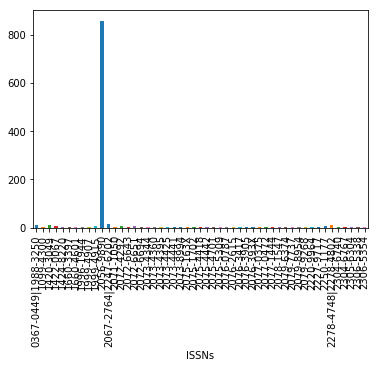

In [33]:
# make sure figures appear inline in Jupyter Notebook
%matplotlib inline
# create a quick bar chart
article_counts.plot(kind='bar')

{: .source}

![Articles by ISSN Plot]({{ page.root }}/fig/articlesByISSN.png)
Articles by ISSN plot

We can also look at how many articles were published in each language:

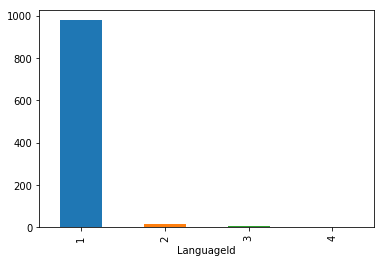

In [34]:
language_count = articles_df.groupby('LanguageId')['Title'].count()
# let's plot that too
language_count.plot(kind='bar');

{: .source}

> ## Activities
> 1. Create a plot of average number of authors across all publishers.
> 1. Create a plot of average number of authors across all publishers per language.
{:.challenge}


> ## Summary Plotting Challenge
>
> Create a stacked bar plot, with Number of articles on the Y axis, and the
> stacked variable being `LicenceId`. The plot should show total number of articles
> by license for each month. Some tips are below to help you solve this
> challenge:
>
> * [For more on Pandas plots, visit this link.](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.core.groupby.DataFrameGroupBy.plot.html)
> * You can use the code that follows to create a stacked bar plot but the data to stack
>   need to be in individual columns.  Here's a simple example with some data where
>   'a', 'b', and 'c' are the groups, and 'one' and 'two' are the subgroups.
>
> ~~~
> d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
> pd.DataFrame(d)
> ~~~
> {: .source}
>
> shows the following data
>
> ~~~
>        one  two
>    a    1    1
>    b    2    2
>    c    3    3
>    d  NaN    4
> ~~~
> {: .output}
>
> We can plot the above with
>
> ~~~
> # plot stacked data so columns 'one' and 'two' are stacked
> my_df = pd.DataFrame(d)
> my_df.plot(kind='bar',stacked=True,title="The title of my graph")
> ~~~
> {: .source}
>
> ![Stacked Bar Plot]({{ page.root }}/fig//stackedBar1.png)
>
> * You can use the `.unstack()` method to transform grouped data into columns
> for each plotting.  Try running `.unstack()` on some DataFrames above and see
> what it yields.
>
> Start by transforming the grouped data (by `LicenceId` and `Month`) into an
> unstacked layout, then create a stacked plot.
>
{:.challenge}

> ## Solution to Summary Challenge
>
> First we group data by `Month` and by `LicenceId`, and then calculate a total for
> each `Month`.
>
> ~~~
> by_month_lic = articles_df.groupby(['Month','LicenceId'])
> month_lic_count = by_month_lic.size()
> ~~~
> {: .source}
>
> This calculates the number of articles for each `Month` and `LicenceId` as a table
>
> ~~~
> Month  LicenceId
> 1      1             50
> 2      1             96
> 3      1             79
> 4      1             69
>        2              7
> 5      1            107
> 6      1             91
> 7      1             94
> 8      1             90
>        2             13
> 9      1             77
> 10     1            104
> 11     1             97
>        2             10
>        3              6
> 12     4             11
> dtype: int64
> ~~~
> {: .output}
>
> Below we'll use `.unstack()` on our grouped data to figure out the total weight
> that each language contributed to each publisher.
>
> ~~~
> by_month_lic = articles_df.groupby(['Month','LicenceId'])
> month_lic_count = by_month_lic.size()
> mlc = month_lic_count.unstack()
> ~~~
> {: .source}
>
> The `unstack` function above will display the following output:
>
> ~~~
> LicenceId   1    2    3    4
> Month
> 1          50  NaN  NaN  NaN
> 2          96  NaN  NaN  NaN
> 3          79  NaN  NaN  NaN
> 4          69    7  NaN  NaN
> 5         107  NaN  NaN  NaN
> 6          91  NaN  NaN  NaN
> 7          94  NaN  NaN  NaN
> 8          90   13  NaN  NaN
> 9          77  NaN  NaN  NaN
> 10        104  NaN  NaN  NaN
> 11         97   10    6  NaN
> 12        NaN  NaN  NaN   11
> ~~~
> {: .output}
>
> Now, create a stacked bar plot with that data where the article count for each
> Month are stacked by License.
>
> Rather than display it as a table, we can plot the above data by stacking the
> values of each licence as follows:
>
> ~~~
> by_month_lic = articles_df.groupby(['Month','LicenceId'])
> month_lic_count = by_month_lic.size()
> mlc = month_lic_count.unstack()
>
> s_plot = mlc.plot(kind='bar',stacked=True,title="Total number of articles by Month and Licence")
> s_plot.set_ylabel("Licence Count")
> s_plot.set_xlabel("Month");
> ~~~
> {: .source}
>
> ![Stacked Bar Plot]({{ page.root }}/fig/stackedBar.png)
{:.solution}

## Example and challeges with weed data

In [1]:
ls data/

Revised-SampleDataDuplicateCopiesAcrossLibraryUnits - Sheet2.csv
SampleDataDDATitlesAcquired.csv
SampleDataOctober2017HeadAndExitCounts.xlsx
SampleDataWeedListTitles.csv
SampleDataWeedListTitles.xlsx
articles.csv
doaj-article-sample.csv
doajarticlesample/
doajarticlesample.zip
leavey_oct-2017_exit_hour.csv
leavey_oct-2017_head-counts.csv


In [2]:
import pandas as pd

In [3]:
weedl = pd.read_csv('data/SampleDataWeedListTitles.csv')

In [4]:
weedl.head()

,Call Number,Call Number (Formatted),Title,Author,Barcode,Library,Home Location,Current Location,Year,Date Added,Last Check-Out,Check-Outs,Unnamed: 12,Unnamed: 13
0,ZA4482 .B596 2009,ZA4482.B5962009,Content nation : surviving and thriving as soc...,"Blossom, John, 1954-",31275046048881,LEAVEY,BOOKSTACKS,BOOKSTACKS,2009.0,4/22/2009,Never,0.0,NaN,NaN
1,ZA3075 .L46 2010,ZA3075.L462010,The Facts on File guide to research / Jeff Len...,"Lenburg, Jeff",31275049232839,LEAVEY,BOOKSTACKS,BOOKSTACKS,2010.0,6/1/2011,Never,0.0,NaN,NaN
2,ZA3075 .B87 2003,ZA3075.B872003,"Teaching information literacy : 35 practical, ...","Burkhardt, Joanna M",31275037934479,LEAVEY,BOOKSTACKS,BOOKSTACKS,2003.0,8/3/2003,1/13/2010,4.0,NaN,NaN
3,Z8971.5 .M93 1993 Suppl.,Z8971.5.M931993Suppl.,"Supplement to ""Walt Whitman, a descriptive bib...","Myerson, Joel",31275048512603,LEAVEY,BOOKSTACKS,BOOKSTACKS,2011.0,9/12/2011,Never,0.0,NaN,NaN
4,Z7551 .M36,Z7551.M36,DataMap,NaN,1012266-9001,LEAVEY,BOOKSTACKS,BOOKSTACKS,19.0,1/24/1997,Never,0.0,NaN,NaN


In [5]:
weedl.columns

Index(['Call Number', 'Call Number (Formatted)', 'Title', 'Author', 'Barcode',
       'Library', 'Home Location', 'Current Location', 'Year', 'Date Added',
       'Last Check-Out', 'Check-Outs', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [12]:
weedl.rename(index=str, columns={"Call Number": "callnum", "Call Number (Formatted)": "callnum_format", "Title": "title", 
                                "Author": 'author', "Barcode": 'barcode', "Library": "library", 
                                 "Home Location": "home_location", "Current Location": "current_loc", "Year": "year",
                                 "Date Added": "date_added", "Last Check-Out": "last_co", "Check-Outs": "check_outs",
                                 "Unnamed: 12": "unamed12", "Unnamed: 13": "unamed13"
                                }, inplace = True)

In [13]:
weedl

,callnum,callnum_format,title,author,barcode,library,home_location,current_loc,year,date_added,last_co,check_outs,unamed12,unamed13
0,ZA4482 .B596 2009,ZA4482.B5962009,Content nation : surviving and thriving as soc...,"Blossom, John, 1954-",31275046048881,LEAVEY,BOOKSTACKS,BOOKSTACKS,2009.0,4/22/2009,Never,0.0,NaN,NaN
1,ZA3075 .L46 2010,ZA3075.L462010,The Facts on File guide to research / Jeff Len...,"Lenburg, Jeff",31275049232839,LEAVEY,BOOKSTACKS,BOOKSTACKS,2010.0,6/1/2011,Never,0.0,NaN,NaN
2,ZA3075 .B87 2003,ZA3075.B872003,"Teaching information literacy : 35 practical, ...","Burkhardt, Joanna M",31275037934479,LEAVEY,BOOKSTACKS,BOOKSTACKS,2003.0,8/3/2003,1/13/2010,4.0,NaN,NaN
3,Z8971.5 .M93 1993 Suppl.,Z8971.5.M931993Suppl.,"Supplement to ""Walt Whitman, a descriptive bib...","Myerson, Joel",31275048512603,LEAVEY,BOOKSTACKS,BOOKSTACKS,2011.0,9/12/2011,Never,0.0,NaN,NaN
4,Z7551 .M36,Z7551.M36,DataMap,NaN,1012266-9001,LEAVEY,BOOKSTACKS,BOOKSTACKS,19.0,1/24/1997,Never,0.0,NaN,NaN
5,Z733.U58 G66,Z733.U58G66,Treasures of the Library of Congress / Charles...,"Goodrum, Charles A",31275001451914,LEAVEY,BOOKSTACKS,BOOKSTACKS,1980.0,9/25/1996,7/29/2004,16.0,NaN,NaN
6,Z7164.I8 I48,Z7164.I8I48,Intercom,"Intercom (New York, N.Y.)",1027149-1001,LEAVEY,BOOKSTACKS,BOOKSTACKS,1959.0,1/26/1997,Never,0.0,NaN,NaN
7,Z711.2 .Y68 1999,Z711.2.Y681999,Working with faculty to design undergraduate i...,"Young, Rosemary, 1950-",31275034858986,LEAVEY,BOOKSTACKS,BOOKSTACKS,1999.0,3/7/2000,4/21/2011,31.0,NaN,NaN
8,Z711.2 .F87 2000,Z711.2.F872000,Future teaching roles for academic librarians ...,"Bahr, Alice Harrison",31275036478866,LEAVEY,BOOKSTACKS,BOOKSTACKS,2000.0,12/15/2001,5/9/2006,16.0,NaN,NaN
9,Z699 .U74 1983,Z699.U741983,Using online catalogs : a nationwide survey : ...,"Matthews, Joseph R",31275006416854,LEAVEY,BOOKSTACKS,BOOKSTACKS,1983.0,1/4/1997,2/14/2011,40.0,NaN,NaN


In [20]:
#pat = '\d+\/\d+\/\d+'
weedl = weedl.join(weedl.last_co.str.extract("\d+\/\d+\/(\d+)", expand=True))

In [28]:
weedl.rename(columns = {0: "last_co_year"}, inplace=True)

In [29]:
weedl.columns

Index(['callnum', 'callnum_format', 'title', 'author', 'barcode', 'library',
       'home_location', 'current_loc', 'year', 'date_added', 'last_co',
       'check_outs', 'unamed12', 'unamed13', 'last_co_year'],
      dtype='object')

In [30]:
weedl

,callnum,callnum_format,title,author,barcode,library,home_location,current_loc,year,date_added,last_co,check_outs,unamed12,unamed13,last_co_year
0,ZA4482 .B596 2009,ZA4482.B5962009,Content nation : surviving and thriving as soc...,"Blossom, John, 1954-",31275046048881,LEAVEY,BOOKSTACKS,BOOKSTACKS,2009.0,4/22/2009,Never,0.0,NaN,NaN,NaN
1,ZA3075 .L46 2010,ZA3075.L462010,The Facts on File guide to research / Jeff Len...,"Lenburg, Jeff",31275049232839,LEAVEY,BOOKSTACKS,BOOKSTACKS,2010.0,6/1/2011,Never,0.0,NaN,NaN,NaN
2,ZA3075 .B87 2003,ZA3075.B872003,"Teaching information literacy : 35 practical, ...","Burkhardt, Joanna M",31275037934479,LEAVEY,BOOKSTACKS,BOOKSTACKS,2003.0,8/3/2003,1/13/2010,4.0,NaN,NaN,2010
3,Z8971.5 .M93 1993 Suppl.,Z8971.5.M931993Suppl.,"Supplement to ""Walt Whitman, a descriptive bib...","Myerson, Joel",31275048512603,LEAVEY,BOOKSTACKS,BOOKSTACKS,2011.0,9/12/2011,Never,0.0,NaN,NaN,NaN
4,Z7551 .M36,Z7551.M36,DataMap,NaN,1012266-9001,LEAVEY,BOOKSTACKS,BOOKSTACKS,19.0,1/24/1997,Never,0.0,NaN,NaN,NaN
5,Z733.U58 G66,Z733.U58G66,Treasures of the Library of Congress / Charles...,"Goodrum, Charles A",31275001451914,LEAVEY,BOOKSTACKS,BOOKSTACKS,1980.0,9/25/1996,7/29/2004,16.0,NaN,NaN,2004
6,Z7164.I8 I48,Z7164.I8I48,Intercom,"Intercom (New York, N.Y.)",1027149-1001,LEAVEY,BOOKSTACKS,BOOKSTACKS,1959.0,1/26/1997,Never,0.0,NaN,NaN,NaN
7,Z711.2 .Y68 1999,Z711.2.Y681999,Working with faculty to design undergraduate i...,"Young, Rosemary, 1950-",31275034858986,LEAVEY,BOOKSTACKS,BOOKSTACKS,1999.0,3/7/2000,4/21/2011,31.0,NaN,NaN,2011
8,Z711.2 .F87 2000,Z711.2.F872000,Future teaching roles for academic librarians ...,"Bahr, Alice Harrison",31275036478866,LEAVEY,BOOKSTACKS,BOOKSTACKS,2000.0,12/15/2001,5/9/2006,16.0,NaN,NaN,2006
9,Z699 .U74 1983,Z699.U741983,Using online catalogs : a nationwide survey : ...,"Matthews, Joseph R",31275006416854,LEAVEY,BOOKSTACKS,BOOKSTACKS,1983.0,1/4/1997,2/14/2011,40.0,NaN,NaN,2011


In [37]:
weedl.last_co_year.dropna().min()

'1991'

In [38]:
weedl.last_co_year.dropna().max()

'2011'

In [39]:
weedl.last_co_year.value_counts()

2010    147
2011    145
2004     85
2005     80
2009     70
2006     60
2007     59
2003     58
2008     50
2002     14
2001      5
1999      3
2000      2
1997      2
1993      1
1991      1
1998      1
Name: last_co_year, dtype: int64

In [64]:
import numpy as np

In [67]:
weedl['last_co_year_int'] = pd.to_numeric(weedl['last_co_year'], errors='coerce').fillna(0).astype(np.int64)

In [68]:
weedl.dtypes

callnum              object
callnum_format       object
title                object
author               object
barcode              object
library              object
home_location        object
current_loc          object
year                float64
date_added           object
last_co              object
check_outs          float64
unamed12            float64
unamed13            float64
last_co_year         object
last_co_year_int      int64
dtype: object

In [ ]:
weedl[]